In [37]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv('train.csv')

In [39]:
data = np.array(data)
data.shape

(42000, 785)

In [ ]:
X = data[:, 1:]
Y = data[:, 0]


X_validation = X[0:1000].T
Y_validation = Y[0:1000]
X_test = X[1000:2000].T
Y_test = Y[1000:2000]
X_train = X[2000:].T
Y_train = Y[2000:]
X_train = X_train / 255
X_validation = X_validation / 255
X_test = X_test / 255


print(X_train.shape,
Y_train.shape,X_test.shape,Y_test.shape,X_validation.shape,Y_validation.shape)


(784, 40000) (40000,) (784, 1000) (1000,) (784, 1000) (1000,)


In [87]:
_,m_train = X_train.shape

In [ ]:
import numpy as np

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return Z > 0

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def one_hot(Y):
    Y = Y.astype(int)
    n = Y.shape[0]
    Y_hot = np.zeros((10, n))
    Y_hot[Y, np.arange(n)] = 1
    return Y_hot

def cross_entropy(Y, A):
    m = A.shape[1]
    loss = -np.sum(Y * np.log(A + 1e-8)) / m
    return loss

def init_parameters():
    W1 = np.random.randn(128, 784) * 0.01
    B1 = np.zeros((128, 1))
    W2 = np.random.randn(64, 128) * 0.01
    B2 = np.zeros((64, 1))
    W3 = np.random.randn(10,64) * 0.01
    B3 = np.zeros((10, 1))
    return W1, B1, W2, B2,W3,B3


def forward(X, W1, B1, W2, B2,W3,B3):
    Z1 = W1 @ X + B1
    A1 = relu(Z1)
    Z2 = W2 @ A1 + B2
    A2 = relu(Z2)
    Z3 = W3 @ A2 +B3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2,Z3,A3

def backward(X, Y, W1, B1, W2, B2,W3,B3, Z1, A1, Z2, A2,Z3,A3): #ต้องเรียนรู็ตรงนี้อีก
    m = X.shape[1]
    dZ3 = A3 - Y
    dW3 = (1/m) * dZ3 @ A2.T
    dB3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)

    dA2 = W3.T @ dZ3
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = (1/m) * dZ2 @ A1.T
    dB2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = W2.T @ dZ2
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1/m) * dZ1 @ X.T
    dB1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, dB1, dW2, dB2,dW3,dB3

def update_parameters(W1, B1, W2, B2,W3,B3, dW1, dB1, dW2, dB2,dW3,dB3, learning_rate):
    W1 -= learning_rate * dW1
    B1 -= learning_rate * dB1
    W2 -= learning_rate * dW2
    B2 -= learning_rate * dB2
    W3 -= learning_rate * dW3
    B3 -= learning_rate * dB3
    return W1, B1, W2, B2 ,W3, B3

def prediction(X, W1, B1, W2, B2,W3,B3):
    Z1, A1, Z2, A2,Z3,A3 = forward(X, W1, B1, W2, B2,W3,B3)
    Y_pred = np.argmax(A3, axis=0)
    return Y_pred
def get_accuracy(X, Y, W1, B1, W2, B2,W3,B3):
    Y_pred = prediction(X, W1, B1, W2, B2,W3,B3)
    accuracy = np.mean(Y_pred == Y)
    return accuracy
def train(X_train, Y_train, X_validation, Y_validation, epochs, alpha):
    W1, B1, W2, B2,W3,B3 = init_parameters()
    Y_train_hot = one_hot(Y_train.astype(int))

    history_loss = []
    history_acc = []

    for epoch in range(1, epochs + 1):
        Z1, A1, Z2, A2 ,Z3 ,A3= forward(X_train, W1, B1, W2, B2,W3,B3)
        dW1, dB1, dW2, dB2 ,dW3,dB3= backward(X_train, Y_train_hot, W1, B1, W2, B2,W3,B3, Z1, A1, Z2, A2,Z3,A3)
        W1, B1, W2, B2, W3, B3 = update_parameters(W1, B1, W2, B2,W3,B3, dW1, dB1, dW2, dB2,dW3,dB3, alpha)

        loss = cross_entropy(Y_train_hot, A3)
        history_loss.append(loss)

        acc = get_accuracy(X_validation, Y_validation, W1, B1, W2, B2, W3, B3)
        history_acc.append(acc)

        if epoch % 100 == 0 or epoch == 1:
            print(f"Epoch {epoch} | Train Loss: {loss:.4f} | Val Accuracy: {acc*100:.2f}%")

    return W1, B1, W2, B2, W3, B3, history_loss, history_acc


In [270]:
epochs = 1000
alpha =  .243
W1, B1, W2, B2,W3,B3, history_loss, history_acc = train(
    X_train, Y_train,
    X_validation, Y_validation,
    epochs=epochs,
    alpha=alpha
)

Epoch 1 | Train Loss: 2.3026 | Val Accuracy: 9.50%
Epoch 100 | Train Loss: 2.2935 | Val Accuracy: 9.60%
Epoch 200 | Train Loss: 0.8462 | Val Accuracy: 75.00%
Epoch 300 | Train Loss: 0.4906 | Val Accuracy: 84.20%
Epoch 400 | Train Loss: 0.3497 | Val Accuracy: 90.60%
Epoch 500 | Train Loss: 0.2830 | Val Accuracy: 92.20%
Epoch 600 | Train Loss: 0.2341 | Val Accuracy: 93.50%
Epoch 700 | Train Loss: 0.1974 | Val Accuracy: 93.90%
Epoch 800 | Train Loss: 0.1688 | Val Accuracy: 94.40%
Epoch 900 | Train Loss: 0.1463 | Val Accuracy: 95.20%
Epoch 1000 | Train Loss: 0.1284 | Val Accuracy: 95.50%


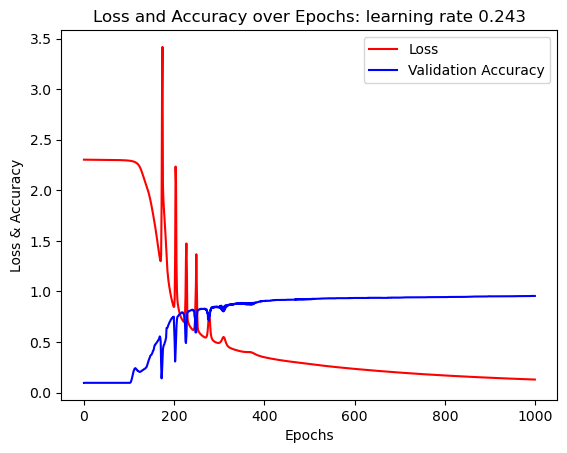

In [271]:
plt.plot(history_loss,color="r",label="Loss")
plt.plot(history_acc,color="b",label="Validation Accuracy")

#make lable red is Loss and blue is accuracy
plt.title(f"Loss and Accuracy over Epochs: learning rate {alpha}")
plt.legend()  
plt.xlabel("Epochs")
plt.ylabel("Loss & Accuracy")
plt.show()


In [ ]:
acc = get_accuracy(X_test, Y_test, W1, B1, W2, B2,W3,B3)
print(f"Test Accuracy: {acc*100:.2f}%")

Test Accuracy: 95.90%


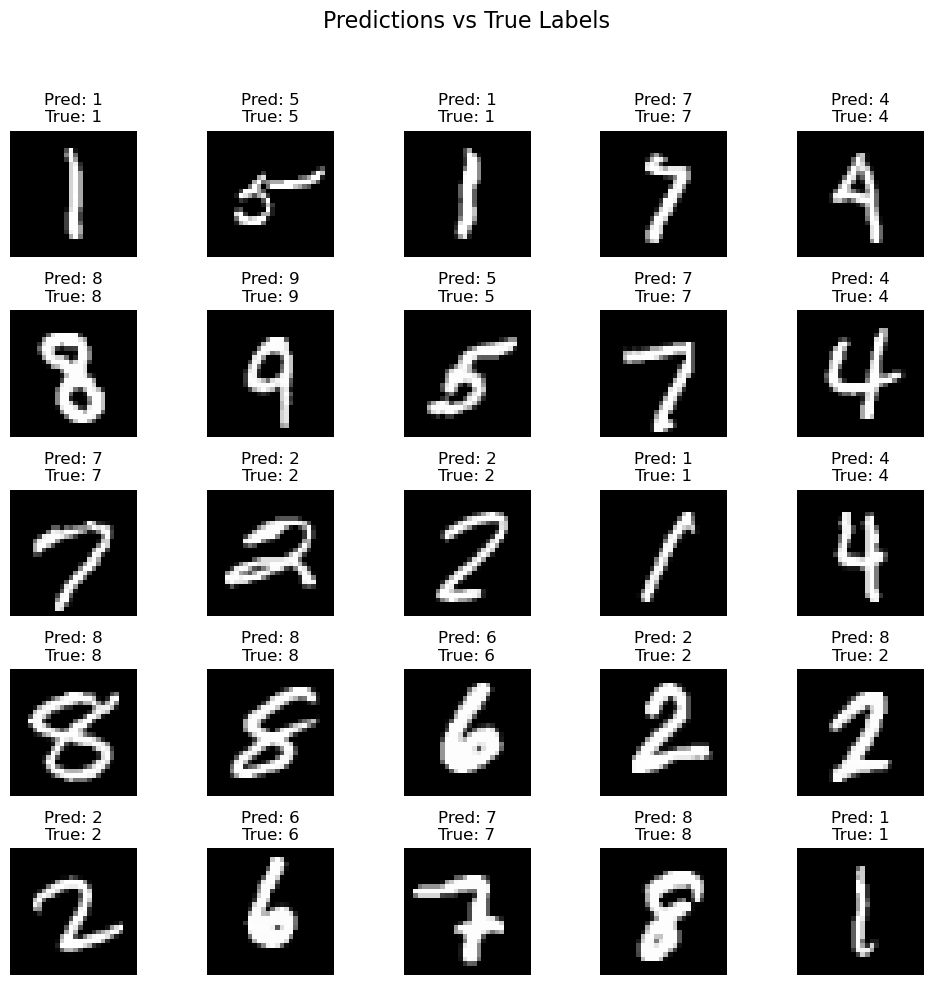

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
fig.suptitle("Predictions vs True Labels", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i >= X_test.shape[1]:
        break
    img = X_test[:, i].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Pred: {pre[i]}\nTrue: {Y_test[i]}")
    ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [279]:
#save all w in teh txt file
with open('weights_and_bias.txt', 'w') as f:
    f.write("W1\n")
    np.savetxt(f, W1)
    f.write("B1\n")
    np.savetxt(f, B1)
    f.write("W2\n")
    np.savetxt(f, W2)
    f.write("B2\n")
    np.savetxt(f, B2)
    f.write("W3\n")
    np.savetxt(f, W3)
    f.write("B3\n")
    np.savetxt(f, B3)